### Description of the dataset
The dataset we will use contains preprocessed/clean data about **440 clients** of a wholesale distributor, mainly about the products that clients buy during one year. Below is a brief description of the **8 attributes** in this dataset:

- FRESH: annual spending on fresh products
- MILK: annual spending on milk products
- GROCERY: annual spending on grocery products
- FROZEN: annual spending on frozen products
- DETERGENTS_PAPER: annual spending on detergents and paper products
- DELICATESSEN: annual spending on delicatessen products
- TYPE: type of customer - Hotel/Restaurant/Cafe (1) or wholesale depot (2)
- REGION: region where customer lives - Tunis (1), Sfax (2) or Other (3)

We will use this dataset to extract clustering patterns, i.e. determine whether these customers can be divided into a small number of groups.

Source: http://archive.ics.uci.edu/ml/datasets/Wholesale+customers

In [1]:
# import Python libraries we will need later

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# allow plots to appear inside the notebook
%matplotlib inline

# set the font size of plots
plt.rcParams['font.size'] = 14

In [3]:
# import some modules from the scikit-learn library

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Getting the data

In [4]:
df0 = pd.read_csv('Wholesale customers data.csv')

In [5]:
print(type(df0))
print(df0.shape)

<class 'pandas.core.frame.DataFrame'>
(440, 8)


In [6]:
df0.head()

,Type,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df0.dtypes

Type                int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [8]:
df0.describe()

,Type,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
df0.Type.value_counts()

1    298
2    142
Name: Type, dtype: int64

In [10]:
df0.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

## Data Preparation

In [11]:
# Create a copy of original data frame
df_hot = df0

###  a) One hot encoding

In [12]:
#  Convert the 'Type' attribute to binary using the get_dummies() method

dummies = pd.get_dummies(df_hot['Type'], prefix='Type')  #create 2 binary attributes based on Type attrubute
df_hot = pd.concat([df_hot, dummies], axis=1)    #add these attrubutes to data frame
df_hot.drop('Type', axis=1, inplace=True)  # remove the categorical attribute from data frame
df_hot.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Type_1,Type_2
0,3,12669,9656,7561,214,2674,1338,0,1
1,3,7057,9810,9568,1762,3293,1776,0,1
2,3,6353,8808,7684,2405,3516,7844,0,1
3,3,13265,1196,4221,6404,507,1788,1,0
4,3,22615,5410,7198,3915,1777,5185,0,1


In [13]:
# Remove the Type_2 attribute because it is redundant
df_hot.drop('Type_2', axis=1, inplace=True)
df_hot.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Type_1
0,3,12669,9656,7561,214,2674,1338,0
1,3,7057,9810,9568,1762,3293,1776,0
2,3,6353,8808,7684,2405,3516,7844,0
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,0


In [14]:
dummies = pd.get_dummies(df_hot['Region'], prefix='Region')  #create 2 binary attributes based on Type attrubute
df_hot = pd.concat([df_hot, dummies], axis=1)    #add these attrubutes to data frame
df_hot.drop('Region', axis=1, inplace=True)  # remove the categorical attribute from data frame
df_hot.head()



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Type_1,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,0,0,1
1,7057,9810,9568,1762,3293,1776,0,0,0,1
2,6353,8808,7684,2405,3516,7844,0,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,1
4,22615,5410,7198,3915,1777,5185,0,0,0,1


In [15]:
# Remove the Region_3 attribute because it is redundant
df_hot.drop('Region_3', axis=1, inplace=True)
df_hot.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Type_1,Region_1,Region_2
0,12669,9656,7561,214,2674,1338,0,0,0
1,7057,9810,9568,1762,3293,1776,0,0,0
2,6353,8808,7684,2405,3516,7844,0,0,0
3,13265,1196,4221,6404,507,1788,1,0,0
4,22615,5410,7198,3915,1777,5185,0,0,0


In [16]:
# verify the shape of the new data frame
df_hot.shape

(440, 9)

### b) Scale normalization


In [17]:
# create an instance of MinMaxScaler class
scaler = MinMaxScaler()

# call the fit() method
scaler.fit(df_hot)

# call the transform() method
scaler.transform(df_hot)

# put the result in a data frame called df_transformed
columns= ['Fresh','Milk' ,'Grocery', 'Frozen', 'Detergents_Paper' ,'Delicassen','Type_1','Region_1', 'Region_2' ]         
df_transformed=scaler.transform(df_hot)


df_transformed = pd.DataFrame(df_transformed, columns=columns, index = df_hot.index)


In [18]:
# Check the size of the new data frame
df_transformed.shape

(440, 9)

In [19]:
# Check the first few lines in the new data frame
df_transformed.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Type_1,Region_1,Region_2
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,0.0,0.0,0.0
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,0.0,0.0,0.0
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,0.0,0.0,0.0
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,1.0,0.0,0.0
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,0.0,0.0,0.0


In [20]:
# Check the distribution of values (make sure they are between 0 and 1)
df_transformed.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Type_1,Region_1,Region_2
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.0000,440.000000
mean,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745,0.677273,0.1750,0.106818
std,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826,0.468052,0.3804,0.309234
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453,0.000000,0.0000,0.000000
50%,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077,1.000000,0.0000,0.000000
75%,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907,1.000000,0.0000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000


## kMeans Clustering Method

**References: **
- http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [21]:
# Run kMeans with 3 clusters
K = 3
km = KMeans(n_clusters=K, random_state=10)   # create instance of KMeans class
km.fit(df_transformed)  # run kMeans algorithm with 3 clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [22]:
# Determine the value of SSD (Sum of Squared Distances)
km.inertia_

75.07473014024927

In [23]:
# Run kMeans algorithm with different values of K: K=1,...,15  and store the value of SSD for each K in a list
K_values = range(1,16)
Sum_of_squared_distances = []   # initialize empty list to store SSD values
for k in K_values:  # be careful, k not K
        km = KMeans(n_clusters=k, random_state=10) 
        km.fit(df_transformed) 
        Sum_of_squared_distances.append(km.inertia_)
print(Sum_of_squared_distances)

[226.60151723193826, 124.43915869969138, 75.07473014024927, 46.94734850440127, 31.52287127609206, 19.418928179725285, 15.67916418107215, 13.129100808295878, 11.733181190386384, 10.662207001695354, 9.77869726864073, 9.342665264577732, 8.585474275988057, 7.651274152461244, 7.682637482625606]


<function matplotlib.pyplot.show>

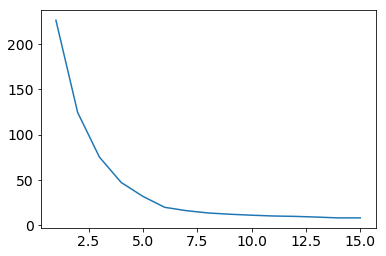

In [24]:
# Plot Sum_of_squared_distances vs. K_values
plt.plot(range(1,16),Sum_of_squared_distances)
plt.show



In [25]:
# Re-run kMeans with the best value of K

km = KMeans(n_clusters=6, random_state=10) 
km.fit(df_transformed) 
n1=km.labels_
n=np.array(n1)
unique, counts = np.unique(n, return_counts=True)
dict(zip(unique, counts))


{0: 59, 1: 211, 2: 105, 3: 28, 4: 19, 5: 18}

In [26]:
# Calculate the silhouette coefficient by calling the function silhouette_score() 

cluster_labels = km.fit_predict(df_transformed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(df_transformed, cluster_labels)
print("For n_clusters =", 6,  "The average silhouette_score is :", silhouette_avg)




For n_clusters = 6 The average silhouette_score is : 0.791141364939208


In [27]:
# Calculate SC for K=2 through K=15
silhouette_list=[]
for k in range(2,15):
    km = KMeans(n_clusters=k, random_state=10) 
    km.fit(df_transformed) 
    cluster_labels = km.fit_predict(df_transformed)
    silhouette_avg = silhouette_score(df_transformed, cluster_labels)
    print("For n_clusters =", k,  "The average silhouette_score is :", silhouette_avg)
    silhouette_list.append(silhouette_avg)
    

For n_clusters = 2 The average silhouette_score is : 0.5376563094806486
For n_clusters = 3 The average silhouette_score is : 0.6397282522870726
For n_clusters = 4 The average silhouette_score is : 0.7004431340986984
For n_clusters = 5 The average silhouette_score is : 0.7491712768585141
For n_clusters = 6 The average silhouette_score is : 0.791141364939208
For n_clusters = 7 The average silhouette_score is : 0.7837764184387308
For n_clusters = 8 The average silhouette_score is : 0.653543765975019
For n_clusters = 9 The average silhouette_score is : 0.6444589430454044
For n_clusters = 10 The average silhouette_score is : 0.5873028630418976
For n_clusters = 11 The average silhouette_score is : 0.5864875482087265
For n_clusters = 12 The average silhouette_score is : 0.5393971601321188
For n_clusters = 13 The average silhouette_score is : 0.472679236489182
For n_clusters = 14 The average silhouette_score is : 0.4677135353707271


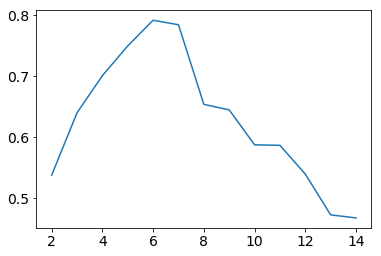

In [28]:
# Plot SC vs. K

plt.plot(range(2,15),silhouette_list)
plt.show()

****